# Calculating the correlation between home values and the crime rate in each neighborhood.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [20]:
# Create a reference the CSV file desired
csv_path ="police_reports_clean.csv"
csv_path_2="population_neighborhood.csv"
csv_path_3 = "zillow_regression.csv"

#Read the csv
police_reports = pd.read_csv(csv_path)
population_df= pd.read_csv(csv_path_2)
zillow_df = pd.read_csv(csv_path_3)

# Print the first five rows of data to the screen

police_reports

,Incident Datetime,Incident Date,Incident Year,Incident Day of Week,Report Datetime,Report Type Description,Filed Online,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,Tuesday,2021-08-15 15:40:00,Initial,False,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,Open or Active,04TH ST \ HOWARD ST,Southern,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,Tuesday,2021-11-23 11:14:00,Initial,False,Arson,Arson,Arson,Open or Active,FILLMORE ST \ PAGE ST,Northern,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,Friday,2018-03-16 23:30:00,Initial,False,Assault,Simple Assault,Battery,Open or Active,JONES ST \ POST ST,Central,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,Tuesday,2019-09-04 14:53:00,Initial,False,Lost Property,Lost Property,Lost Property,Open or Active,07TH ST \ BRANNAN ST,Southern,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,Wednesday,2021-06-23 13:49:00,Initial,False,Fraud,Fraud,"False Claims, Presenting to Government",Open or Active,47TH AVE \ WAWONA ST,Taraval,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411293,2021-05-19 15:00:00,2021-05-19,2021,Wednesday,2021-05-20 07:09:00,Vehicle Initial,False,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen & Recovered",Open or Active,SANTIAGO ST \ 24TH AVE,Taraval,Sunset/Parkside,37.744681,-122.481181,15:00:00,07:09:00,2021-05-20
411294,2021-11-22 09:00:00,2021-11-22,2021,Monday,2021-11-24 13:29:00,Initial,False,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Open or Active,TAYLOR ST \ SACRAMENTO ST,Central,Nob Hill,37.792552,-122.412650,09:00:00,13:29:00,2021-11-24
411295,2021-08-13 00:10:00,2021-08-13,2021,Friday,2021-08-13 03:15:00,Initial,False,Non-Criminal,Non-Criminal,Found Property,Open or Active,TAYLOR ST \ POST ST,Central,Nob Hill,37.787872,-122.411699,00:10:00,03:15:00,2021-08-13
411296,2021-05-19 11:30:00,2021-05-19,2021,Wednesday,2021-05-19 11:36:00,Initial,False,Other Miscellaneous,Other,Investigative Detention,Open or Active,SELBY ST \ QUESADA AVE,Bayview,Bayview Hunters Point,37.738649,-122.400808,11:30:00,11:36:00,2021-05-19


In [5]:
# Droppping non-regression related columns
incident_reports = police_reports.drop(columns=["Filed Online", "Police District", "Report Type Description", 
                                                "Incident Description", "Incident Subcategory", "Incident Day of Week", 
                                               "Resolution", "Intersection"])
incident_reports.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,2021-08-15 15:40:00,Fraud,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,2021-11-23 11:14:00,Arson,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,2021-06-23 13:49:00,Fraud,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23


In [6]:
# Extracting only the year and month from the date columns
def extract_year_month(date_str):
    return "-".join(date_str.split("-")[:2])
incident_reports["Incident Year-Month"] = incident_reports["Incident Date"].apply(extract_year_month)
incident_reports["Report Year-Month"] = incident_reports["Incident Date"].apply(extract_year_month)
incident_reports.head()

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Incident Year-Month,Report Year-Month
0,2021-08-03 10:00:00,2021-08-03,2021,2021-08-15 15:40:00,Fraud,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15,2021-08,2021-08
1,2021-11-23 07:38:00,2021-11-23,2021,2021-11-23 11:14:00,Arson,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23,2021-11,2021-11
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16,2018-03,2018-03
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04,2019-09,2019-09
4,2020-01-01 00:00:00,2020-01-01,2020,2021-06-23 13:49:00,Fraud,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23,2020-01,2020-01


In [7]:
#Get rid of 2023
incident_report_no2023 = incident_reports.loc[incident_reports["Incident Year"]<2023]
incident_report_no2023

,Incident Datetime,Incident Date,Incident Year,Report Datetime,Incident Category,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date,Incident Year-Month,Report Year-Month
0,2021-08-03 10:00:00,2021-08-03,2021,2021-08-15 15:40:00,Fraud,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15,2021-08,2021-08
1,2021-11-23 07:38:00,2021-11-23,2021,2021-11-23 11:14:00,Arson,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23,2021-11,2021-11
2,2018-03-16 19:45:00,2018-03-16,2018,2018-03-16 23:30:00,Assault,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16,2018-03,2018-03
3,2019-09-03 08:25:00,2019-09-03,2019,2019-09-04 14:53:00,Lost Property,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04,2019-09,2019-09
4,2020-01-01 00:00:00,2020-01-01,2020,2021-06-23 13:49:00,Fraud,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23,2020-01,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411293,2021-05-19 15:00:00,2021-05-19,2021,2021-05-20 07:09:00,Motor Vehicle Theft,Sunset/Parkside,37.744681,-122.481181,15:00:00,07:09:00,2021-05-20,2021-05,2021-05
411294,2021-11-22 09:00:00,2021-11-22,2021,2021-11-24 13:29:00,Malicious Mischief,Nob Hill,37.792552,-122.412650,09:00:00,13:29:00,2021-11-24,2021-11,2021-11
411295,2021-08-13 00:10:00,2021-08-13,2021,2021-08-13 03:15:00,Non-Criminal,Nob Hill,37.787872,-122.411699,00:10:00,03:15:00,2021-08-13,2021-08,2021-08
411296,2021-05-19 11:30:00,2021-05-19,2021,2021-05-19 11:36:00,Other Miscellaneous,Bayview Hunters Point,37.738649,-122.400808,11:30:00,11:36:00,2021-05-19,2021-05,2021-05


In [8]:
# Keeping the columns we need.
incident_report_reduced = incident_report_no2023[["Analysis Neighborhood","Incident Year-Month","Incident Category"]]
incident_report_reduced

,Analysis Neighborhood,Incident Year-Month,Incident Category
0,Financial District/South Beach,2021-08,Fraud
1,Hayes Valley,2021-11,Arson
2,Tenderloin,2018-03,Assault
3,South of Market,2019-09,Lost Property
4,Sunset/Parkside,2020-01,Fraud
...,...,...,...
411293,Sunset/Parkside,2021-05,Motor Vehicle Theft
411294,Nob Hill,2021-11,Malicious Mischief
411295,Nob Hill,2021-08,Non-Criminal
411296,Bayview Hunters Point,2021-05,Other Miscellaneous


In [13]:
#Dropping NaN values.
dropnan = incident_report_reduced.dropna(how="any")
dropnan

,Analysis Neighborhood,Incident Year-Month,Incident Category
0,Financial District/South Beach,2021-08,Fraud
1,Hayes Valley,2021-11,Arson
2,Tenderloin,2018-03,Assault
3,South of Market,2019-09,Lost Property
4,Sunset/Parkside,2020-01,Fraud
...,...,...,...
411293,Sunset/Parkside,2021-05,Motor Vehicle Theft
411294,Nob Hill,2021-11,Malicious Mischief
411295,Nob Hill,2021-08,Non-Criminal
411296,Bayview Hunters Point,2021-05,Other Miscellaneous


In [11]:
#Checking we drop all the NaN values.
dropnan.count()

Analysis Neighborhood    411298
Incident Year-Month      411298
Incident Category        411298
dtype: int64

In [14]:
#Group by neighborhood and incident year.
grouped_neighborhood_df = dropnan.groupby(["Analysis Neighborhood","Incident Year-Month"]).count()
grouped_neighborhood_df

Incident Category
Analysis Neighborhood Incident Year-Month                   
Bayview Hunters Point 2018-01                            476
                      2018-02                            397
                      2018-03                            420
                      2018-04                            460
                      2018-05                            444
...                                                      ...
Western Addition      2022-08                            214
                      2022-09                            231
                      2022-10                            229
                      2022-11                            215
                      2022-12                            207

[2460 rows x 1 columns]

In [15]:
#Reset the index
grouped_index = grouped_neighborhood_df.reset_index()
grouped_index

,Analysis Neighborhood,Incident Year-Month,Incident Category
0,Bayview Hunters Point,2018-01,476
1,Bayview Hunters Point,2018-02,397
2,Bayview Hunters Point,2018-03,420
3,Bayview Hunters Point,2018-04,460
4,Bayview Hunters Point,2018-05,444
...,...,...,...
2455,Western Addition,2022-08,214
2456,Western Addition,2022-09,231
2457,Western Addition,2022-10,229
2458,Western Addition,2022-11,215


In [16]:
#Rename th column to match the zillow_df column`s names.
grouped_index = grouped_index.rename(columns={"Analysis Neighborhood":"Neighborhood","Incident Year-Month":"Date","Incident Category":"Number of Crimes"})
grouped_index

,Neighborhood,Date,Number of Crimes
0,Bayview Hunters Point,2018-01,476
1,Bayview Hunters Point,2018-02,397
2,Bayview Hunters Point,2018-03,420
3,Bayview Hunters Point,2018-04,460
4,Bayview Hunters Point,2018-05,444
...,...,...,...
2455,Western Addition,2022-08,214
2456,Western Addition,2022-09,231
2457,Western Addition,2022-10,229
2458,Western Addition,2022-11,215


In [17]:
grouped_index.to_csv("final_crime_regression.csv", index=False)

In [18]:
#Rename columns to merge witht the zillow data frame later.
crime_regression_rename = grouped_index.rename(columns={"Analysis Neighborhood":"Neighborhood","Incident Year-Month":"Date","Incident Datetime":"Number of Crimes"})
crime_regression_rename

,Neighborhood,Date,Number of Crimes
0,Bayview Hunters Point,2018-01,476
1,Bayview Hunters Point,2018-02,397
2,Bayview Hunters Point,2018-03,420
3,Bayview Hunters Point,2018-04,460
4,Bayview Hunters Point,2018-05,444
...,...,...,...
2455,Western Addition,2022-08,214
2456,Western Addition,2022-09,231
2457,Western Addition,2022-10,229
2458,Western Addition,2022-11,215


In [21]:
#Merge the zillow data frame with the data frames for violent and non violent crimes
merge_crime_regression = pd.merge(crime_regression_rename,zillow_df,on=["Neighborhood","Date"])

In [22]:
merge_crime_regression

,Neighborhood,Date,Number of Crimes,Price
0,Bayview Hunters Point,2018-01,476,8.313694e+05
1,Bayview Hunters Point,2018-02,397,8.368342e+05
2,Bayview Hunters Point,2018-03,420,8.423898e+05
3,Bayview Hunters Point,2018-04,460,8.467867e+05
4,Bayview Hunters Point,2018-05,444,8.547810e+05
...,...,...,...,...
2035,Western Addition,2022-08,214,1.105756e+06
2036,Western Addition,2022-09,231,1.082914e+06
2037,Western Addition,2022-10,229,1.064080e+06
2038,Western Addition,2022-11,215,1.049605e+06


In [23]:
#Merging crime and house price data frame with the population to get the crime rate.
crimes_price_population = pd.merge(merge_crime_regression,population_df,on=["Neighborhood"])
crimes_price_population

,Neighborhood,Date,Number of Crimes,Price,Population
0,Bayview Hunters Point,2018-01,476,8.313694e+05,38480.0
1,Bayview Hunters Point,2018-02,397,8.368342e+05,38480.0
2,Bayview Hunters Point,2018-03,420,8.423898e+05,38480.0
3,Bayview Hunters Point,2018-04,460,8.467867e+05,38480.0
4,Bayview Hunters Point,2018-05,444,8.547810e+05,38480.0
...,...,...,...,...,...
2035,Western Addition,2022-08,214,1.105756e+06,22299.0
2036,Western Addition,2022-09,231,1.082914e+06,22299.0
2037,Western Addition,2022-10,229,1.064080e+06,22299.0
2038,Western Addition,2022-11,215,1.049605e+06,22299.0


In [25]:
#Getting the crime rate per 10,000 habitants
crimes_price_population["Crime Rate"] =(crimes_price_population["Number of Crimes"]/crimes_price_population["Population"])*10000
crimes_price_population

,Neighborhood,Date,Number of Crimes,Price,Population,Crime Rate
0,Bayview Hunters Point,2018-01,476,8.313694e+05,38480.0,123.700624
1,Bayview Hunters Point,2018-02,397,8.368342e+05,38480.0,103.170478
2,Bayview Hunters Point,2018-03,420,8.423898e+05,38480.0,109.147609
3,Bayview Hunters Point,2018-04,460,8.467867e+05,38480.0,119.542620
4,Bayview Hunters Point,2018-05,444,8.547810e+05,38480.0,115.384615
...,...,...,...,...,...,...
2035,Western Addition,2022-08,214,1.105756e+06,22299.0,95.968429
2036,Western Addition,2022-09,231,1.082914e+06,22299.0,103.592089
2037,Western Addition,2022-10,229,1.064080e+06,22299.0,102.695188
2038,Western Addition,2022-11,215,1.049605e+06,22299.0,96.416880


In [26]:
#Getting the correlation between prices and overall crimes.
crimes_price_population_correlation = crimes_price_population[["Date","Neighborhood","Price","Crime Rate"]]
crimes_price_population_correlation 

,Date,Neighborhood,Price,Crime Rate
0,2018-01,Bayview Hunters Point,8.313694e+05,123.700624
1,2018-02,Bayview Hunters Point,8.368342e+05,103.170478
2,2018-03,Bayview Hunters Point,8.423898e+05,109.147609
3,2018-04,Bayview Hunters Point,8.467867e+05,119.542620
4,2018-05,Bayview Hunters Point,8.547810e+05,115.384615
...,...,...,...,...
2035,2022-08,Western Addition,1.105756e+06,95.968429
2036,2022-09,Western Addition,1.082914e+06,103.592089
2037,2022-10,Western Addition,1.064080e+06,102.695188
2038,2022-11,Western Addition,1.049605e+06,96.416880


In [60]:
#Correlation between rimes and prices in a given neighborhood
corr_crimes_prices =crimes_price_population_correlation.groupby("Neighborhood")[["Price","Crime Rate"]].corr().iloc[0::2,-1].reset_index()
corr_crimes_prices=corr_crimes_prices.rename(columns={"Crime Rate":"Pearson Coefficient"})
corr_crimes_prices=corr_crimes_prices[["Neighborhood","Pearson Coefficient"]]
corr_crimes_prices

,Neighborhood,Pearson Coefficient
0,Bayview Hunters Point,0.329309
1,Bernal Heights,0.182127
2,Excelsior,-0.172507
3,Financial District/South Beach,0.308947
4,Glen Park,0.192404
5,Haight Ashbury,-0.320217
6,Hayes Valley,-0.188507
7,Inner Richmond,-0.109886
8,Inner Sunset,-0.174477
9,Japantown,-0.026002


In [29]:
#Getting the average crime rate per neighborhood from 2018 to 2022
crime_rate_plot = crimes_price_population_correlation.groupby("Neighborhood").mean()
crime_rate_plot 

,Price,Crime Rate
Neighborhood,,
Bayview Hunters Point,8.985780e+05,119.525295
Bernal Heights,1.448177e+06,54.992543
Excelsior,1.062412e+06,33.593623
Financial District/South Beach,1.082433e+06,256.514102
Glen Park,1.480246e+06,48.917649
Haight Ashbury,1.618526e+06,53.942269
Hayes Valley,1.167238e+06,86.352474
Inner Richmond,2.046474e+06,41.716111
Inner Sunset,1.641420e+06,32.141314


In [35]:
crime_rate_plot_index= crime_rate_plot.reset_index()
crime_rate_plot_index

,Neighborhood,Price,Crime Rate
0,Bayview Hunters Point,8.985780e+05,119.525295
1,Bernal Heights,1.448177e+06,54.992543
2,Excelsior,1.062412e+06,33.593623
3,Financial District/South Beach,1.082433e+06,256.514102
4,Glen Park,1.480246e+06,48.917649
5,Haight Ashbury,1.618526e+06,53.942269
6,Hayes Valley,1.167238e+06,86.352474
7,Inner Richmond,2.046474e+06,41.716111
8,Inner Sunset,1.641420e+06,32.141314
9,Japantown,1.014356e+06,160.825975


In [39]:
crime_rate_plot_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  34 non-null     object 
 1   Price         34 non-null     float64
 2   Crime Rate    34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


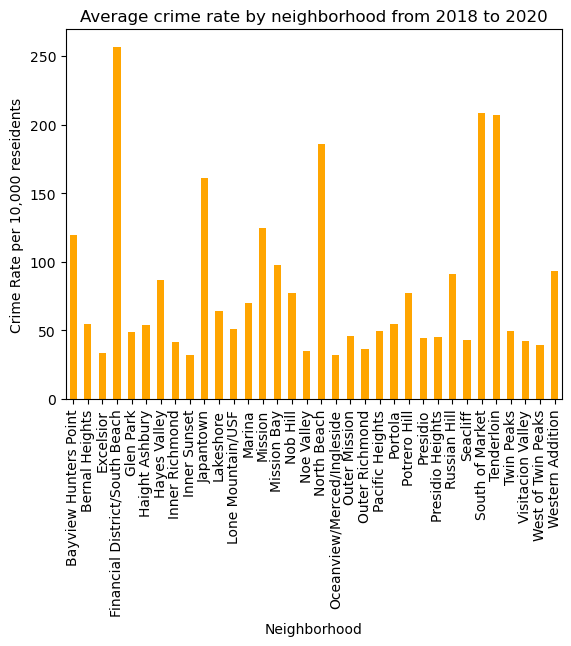

In [54]:
ax = crime_rate_plot_index.plot(x='Neighborhood', y='Crime Rate', kind='bar', color='orange', legend=None)
ax.set_title('Average crime rate by neighborhood from 2018 to 2020')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Crime Rate per 10,000 reseidents')
plt.show()

In [43]:
largest_crime_rates = crime_rate_plot_index.nlargest(10,"Crime Rate")
                                                     
largest_crime_rates

,Neighborhood,Price,Crime Rate
3,Financial District/South Beach,1.082433e+06,256.514102
28,South of Market,9.644633e+05,208.034909
29,Tenderloin,8.607058e+05,206.968086
17,North Beach,1.205987e+06,185.757779
9,Japantown,1.014356e+06,160.825975
13,Mission,1.212682e+06,124.238327
0,Bayview Hunters Point,8.985780e+05,119.525295
14,Mission Bay,1.199511e+06,97.286822
33,Western Addition,1.086230e+06,93.060974
26,Russian Hill,1.643500e+06,90.950632


In [42]:
smallest_crime_rates = crime_rate_plot_index.nsmallest(10,"Crime Rate")
smallest_crime_rates

,Neighborhood,Price,Crime Rate
18,Oceanview/Merced/Ingleside,1.181841e+06,31.967563
8,Inner Sunset,1.641420e+06,32.141314
2,Excelsior,1.062412e+06,33.593623
16,Noe Valley,1.924534e+06,34.750457
20,Outer Richmond,1.859522e+06,36.317266
32,West of Twin Peaks,1.926591e+06,38.976225
7,Inner Richmond,2.046474e+06,41.716111
31,Visitacion Valley,8.866916e+05,42.566038
27,Seacliff,3.521653e+06,43.115342
24,Presidio,1.331060e+06,44.111629


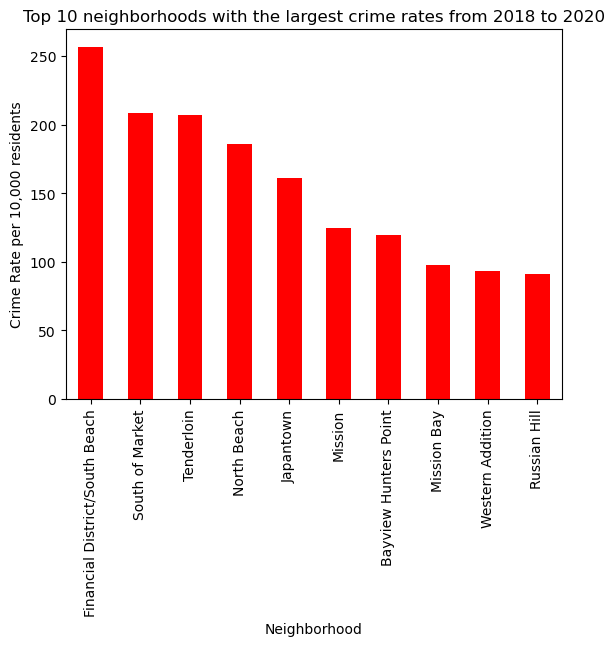

In [61]:
#Plotting the neighborhood with the largest crime rates
ax = largest_crime_rates.plot(x='Neighborhood', y='Crime Rate', kind='bar', color='red', legend=None)
ax.set_title('Top 10 neighborhoods with the largest crime rates from 2018 to 2020')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Crime Rate per 10,000 residents')
plt.show()

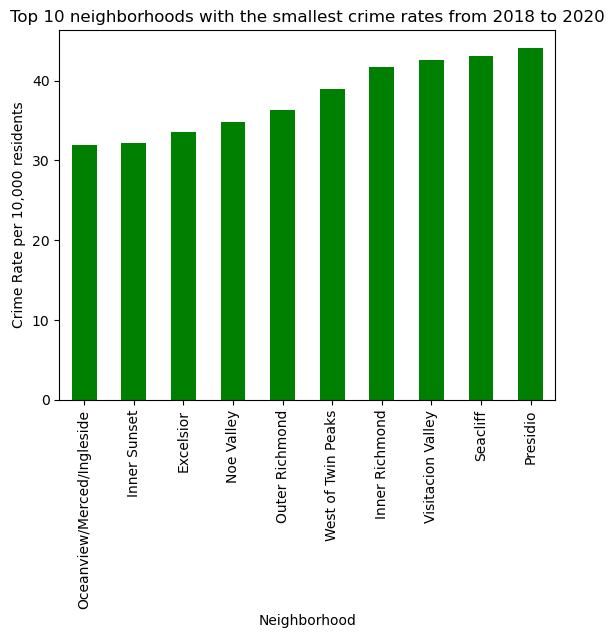

In [59]:
#Plotting the neighborhood with the smallest crime rates
ax = smallest_crime_rates.plot(x='Neighborhood', y='Crime Rate', kind='bar', color='green', legend=None)
ax.set_title('Top 10 neighborhoods with the smallest crime rates from 2018 to 2020')
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Crime Rate per 10,000 residents')
plt.show()